In [44]:
import pandas as pd
import seaborn as sns

In [45]:
df = pd.read_csv('result.csv')
df["duration_mins"] = df["duration_ms"]/60000
df.drop(columns="duration_ms", inplace=True)
df = df.sort_values(by='year', ascending=True)
df

,acousticness,artists,danceability,energy,instrumentalness,key,liveness,loudness,popularity,speechiness,tempo,valence,year,Song,duration_mins
6923,0.9740,bing crosby,0.111,0.184,0.045600,8,0.1110,-15.011,27.0,0.0344,76.416,0.214,1945,silent night,2.614450
2092,0.6570,doris day,0.834,0.284,0.000002,3,0.0676,-13.497,32.0,0.1020,92.224,0.684,1945,everybody loves a lover,2.674450
6151,0.8480,roy orbison,0.400,0.205,0.000000,7,0.4000,-11.794,1.0,0.0270,79.545,0.357,1947,pretty paper,2.756000
2984,0.7990,gene autry,0.834,0.372,0.000000,1,0.2750,-11.990,40.0,0.0358,96.628,0.976,1947,here comes santa claus right down santa claus ...,2.504450
6511,0.8830,gene autry,0.632,0.159,0.000000,8,0.2220,-14.056,35.0,0.0492,142.110,0.644,1947,rudolph the rednosed reindeer,3.112217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,0.5270,giveon,0.451,0.462,0.000000,0,0.3030,-8.962,62.0,0.0782,89.174,0.533,2020,heartbreak anniversary,3.306183
6598,0.0252,megan thee stallion,0.843,0.741,0.000000,11,0.0960,-5.609,89.0,0.3340,168.983,0.680,2020,savage,2.591617
6609,0.0212,the weeknd,0.680,0.826,0.000012,0,0.5430,-5.487,81.0,0.0309,118.051,0.644,2020,save your tears,3.593783
5885,0.0878,meek mill,0.730,0.772,0.000000,5,0.4010,-3.883,75.0,0.3160,147.053,0.403,2020,otherside of america,3.635050


In [46]:
df = df.drop(columns=['artists', 'Song'])

                  acousticness  danceability    energy  instrumentalness  \
acousticness          1.000000     -0.232164 -0.591214         -0.015606   
danceability         -0.232164      1.000000  0.120989          0.025753   
energy               -0.591214      0.120989  1.000000          0.013530   
instrumentalness     -0.015606      0.025753  0.013530          1.000000   
key                  -0.008803      0.018271  0.012761          0.009119   
liveness             -0.010319     -0.108635  0.130367         -0.023792   
loudness             -0.393282      0.067248  0.691635         -0.115751   
popularity           -0.261673      0.139594  0.182244         -0.081350   
speechiness          -0.140061      0.264973  0.110643         -0.038795   
tempo                -0.116051     -0.179754  0.168290         -0.001560   
valence              -0.123871      0.407525  0.332122          0.056373   
year                 -0.390521      0.183586  0.299560         -0.109465   
duration_min

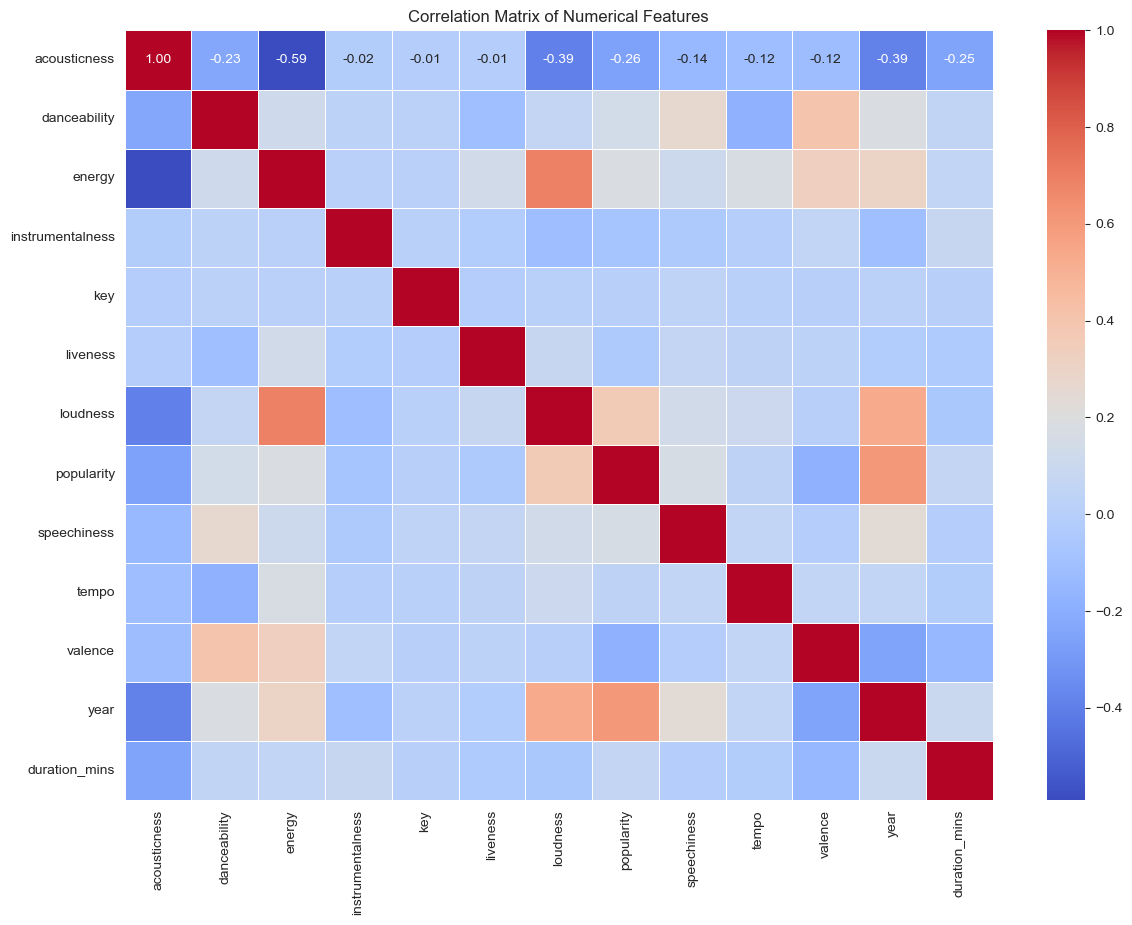

Correlation with Popularity:
 popularity          1.000000
year                0.604163
loudness            0.362895
energy              0.182244
speechiness         0.160917
danceability        0.139594
duration_mins       0.062996
tempo               0.033162
key                 0.004561
liveness           -0.042254
instrumentalness   -0.081350
valence            -0.179310
acousticness       -0.261673
Name: popularity, dtype: float64


In [47]:
from matplotlib import pyplot as plt

correlation_matrix = df.corr()
print(correlation_matrix)

plt.figure(figsize=(14, 10))

# seaborn 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()
popularity_corr = correlation_matrix['popularity'].sort_values(ascending=False)
print("Correlation with Popularity:\n", popularity_corr)

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

X = df[['year', 'loudness', 'energy', 'speechiness', 
        'danceability', 'duration_mins', 'tempo', 'key', 'liveness', 
        'instrumentalness', 'valence',  'acousticness']]
y = df['popularity']

y = (y >= y.median()).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))
print("SVC Classification Report:\n", classification_report(y_test, y_pred_svc))



KNN Accuracy: 0.6691176470588235
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.70      0.68       961
           1       0.68      0.64      0.66       943

    accuracy                           0.67      1904
   macro avg       0.67      0.67      0.67      1904
weighted avg       0.67      0.67      0.67      1904

SVC Accuracy: 0.7058823529411765
SVC Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.73      0.72       961
           1       0.71      0.68      0.70       943

    accuracy                           0.71      1904
   macro avg       0.71      0.71      0.71      1904
weighted avg       0.71      0.71      0.71      1904


In [50]:
from sklearn.model_selection import GridSearchCV

knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn_grid.fit(X_train, y_train)

print("Best KNN Parameters:", knn_grid.best_params_)
best_knn = knn_grid.best_estimator_
y_pred_best_knn = best_knn.predict(X_test)

print("Best KNN Accuracy:", accuracy_score(y_test, y_pred_best_knn))
print("Best KNN Classification Report:\n", classification_report(y_test, y_pred_best_knn))



Best KNN Parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
Best KNN Accuracy: 0.6853991596638656
Best KNN Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.73      0.70       961
           1       0.70      0.64      0.67       943

    accuracy                           0.69      1904
   macro avg       0.69      0.69      0.68      1904
weighted avg       0.69      0.69      0.68      1904


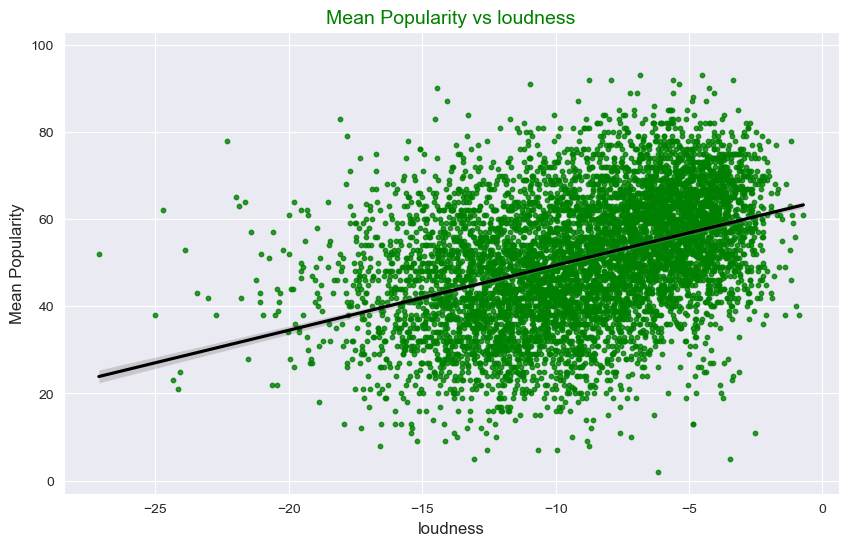

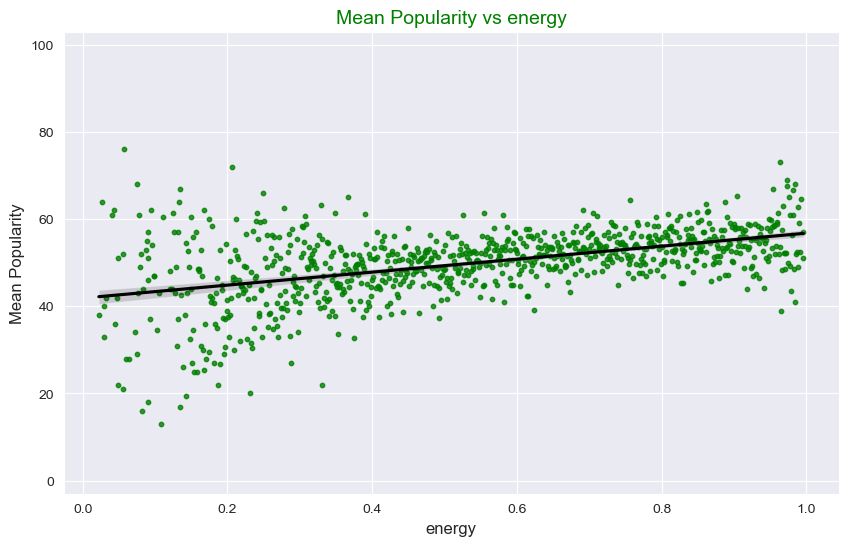

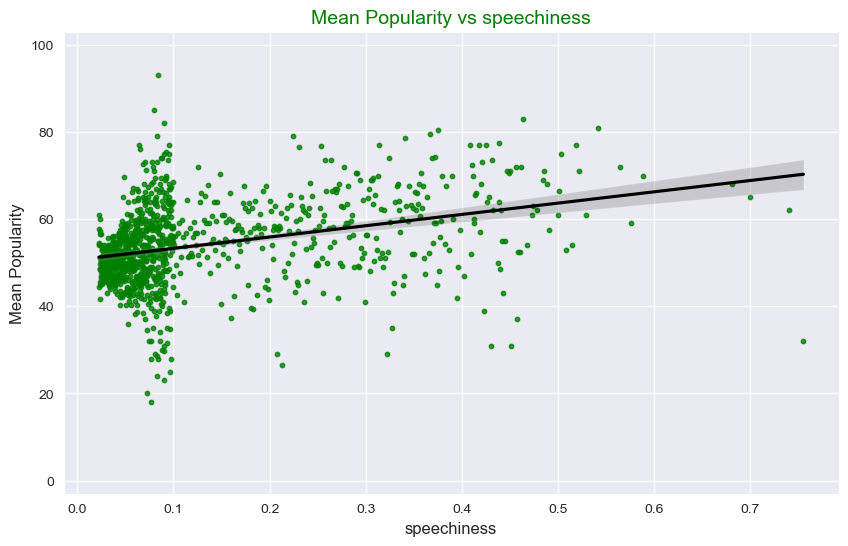

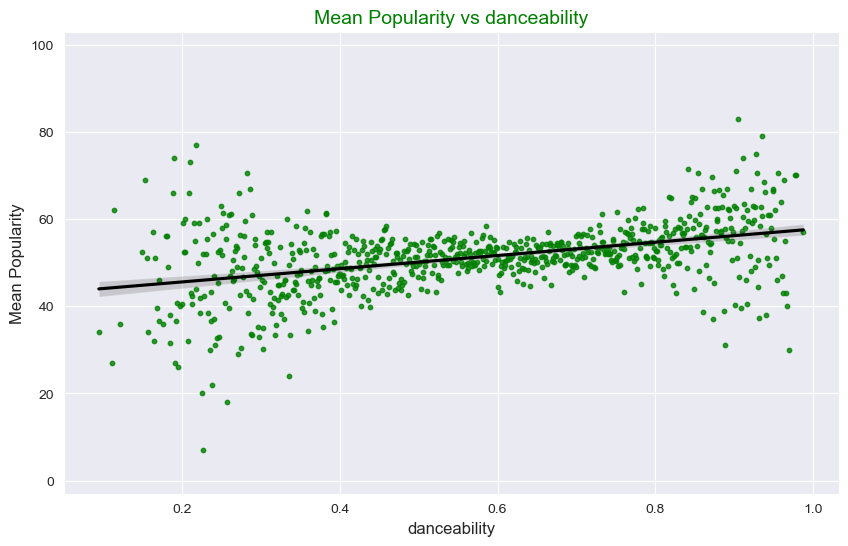

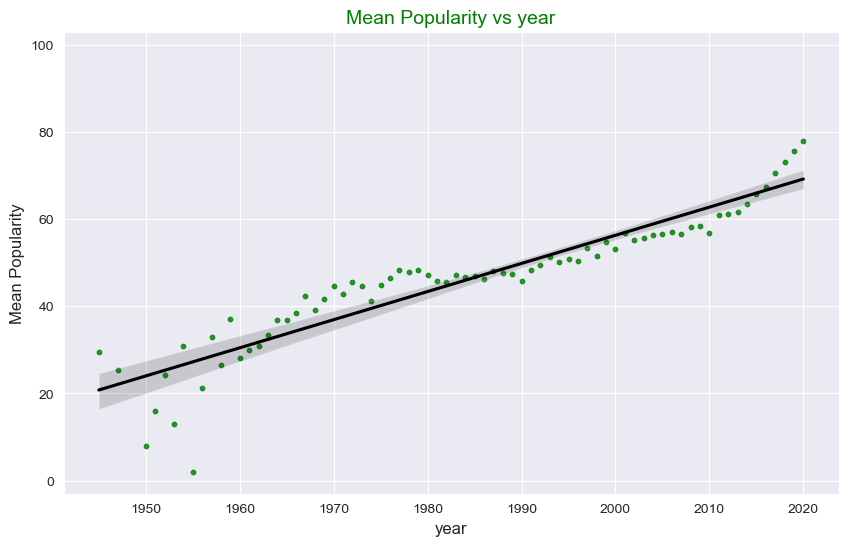

In [51]:

def regress_plot(x, y, data, xlab, ylab, titl):
    # Group data by x and calculate the mean of y
    data = data.groupby(x)[y].mean().reset_index()
    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.regplot(x=x, y=y, data=data, scatter_kws={'color': 'g', "s": 10}, line_kws={'color': 'black'})
    plt.xlabel(xlab, fontsize=12)
    plt.ylabel(ylab, fontsize=12)
    plt.title(titl, fontsize=14, color='green')
    plt.ylim(-3, 103)
    plt.show()

# Assuming df is your DataFrame containing the data
df_filtered = df[(df['year'] >= 1945) & (df['year'] <= 2020)]

# List of features to plot, including 'year'
features = ['loudness', 'energy', 'speechiness', 'danceability', 'year']

# Plotting each feature against popularity
for feature in features:
    regress_plot(
        x=feature,
        y='popularity',
        data=df_filtered,
        xlab=feature,
        ylab='Mean Popularity',
        titl=f'Mean Popularity vs {feature}'
    )


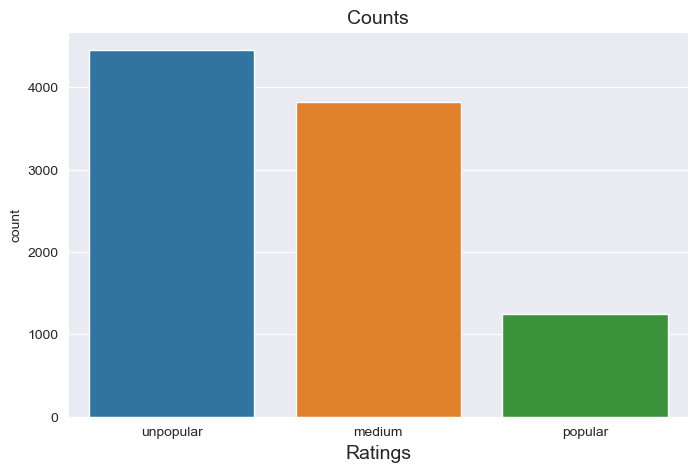

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
classified = df.copy()
classified['pop_rating'] = ''
for i, row in classified.iterrows():
    score = 'unpopular'
    if (row.popularity > 50) & (row.popularity < 70):
        score = 'medium'
    elif row.popularity >= 70:
        score = 'popular'
    classified.at[i, 'pop_rating'] = score

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
_ = sns.countplot(x='pop_rating', data=classified)
_ = plt.xlabel('Ratings', fontsize=14)
_ = plt.title('Counts', fontsize=14)
plt.show()


In [53]:
data = df.copy()
data.loc[((df.popularity >= 0) & (df.popularity <= 50)), "popularity_level" ] = 1
data.loc[((df.popularity > 50) & (df.popularity <= 70)), "popularity_level" ] = 2
data.loc[((df.popularity > 70) & (df.popularity <= 100)), "popularity_level" ] = 3
data["popularity_level"] = data["popularity_level"].astype("int")
data['popularity_level'].value_counts()

popularity_level
1    4450
2    3973
3    1093
Name: count, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split

# Define target variable 'y' and features 'X'
y = data['popularity_level']
X = data.drop(columns=['popularity_level'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [55]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

# Define the preprocessing steps
preprocessor = ColumnTransformer([
    ('minmax', MinMaxScaler(), [
        'year', 'tempo', 'duration_mins', 'loudness', 
        'energy', 'speechiness', 'danceability', 'liveness', 
        'instrumentalness', 'valence',  
        'acousticness'
    ]),
    ('categorical', OneHotEncoder(), ['key'])
], remainder='passthrough')

# Fit the preprocessor on the training data
preprocessor.fit(X_train)

# Transform the training and test data
X_train_preprocessed = preprocessor.transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)
print(f"X_train_preprocessed shape: {X_train_preprocessed.shape}")
print(f"X_test_preprocessed shape: {X_test_preprocessed.shape}")



X_train_preprocessed shape: (7137, 24)
X_test_preprocessed shape: (2379, 24)


In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold

results = []
def run_model(model, alg_name, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cross_val_scores = cross_val_score(model, X_train, y_train, cv=6)
    cr = classification_report(y_test, y_pred)
    results.append((alg_name, accuracy, model))  
    # Print results
    print(f"Model: {alg_name}")
    print(f"Accuracy on Test Set for {alg_name} = {accuracy:.2f}\n")
    print(cr)
    print(f"{alg_name}: CrossVal Accuracy Mean: {cross_val_scores.mean():.2f} and Standard Deviation: {cross_val_scores.std():.2f} \n")


In [57]:
# K-Nearest Neighbors Classifier
model = KNeighborsClassifier()
run_model(model, "Nearest Neighbors Classifier", X_train, X_test, y_train, y_test)


Model: Nearest Neighbors Classifier
Accuracy on Test Set for Nearest Neighbors Classifier = 0.96

              precision    recall  f1-score   support

           1       0.97      0.98      0.98      1132
           2       0.94      0.95      0.95       988
           3       0.92      0.88      0.90       259

    accuracy                           0.96      2379
   macro avg       0.95      0.94      0.94      2379
weighted avg       0.95      0.96      0.95      2379

Nearest Neighbors Classifier: CrossVal Accuracy Mean: 0.95 and Standard Deviation: 0.00 


In [58]:
# Ensure stratified splitting of the data
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
# Define and run the model
def run_model(model, alg_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    # Perform Stratified K-Fold cross-validation
    skf = StratifiedKFold(n_splits=6)
    scores = cross_val_score(model, X_train, y_train, cv=skf)
    cr = classification_report(y_test, y_pred)
    # Store results
    results.append((alg_name, accuracy, model))
    print(f"Model: {alg_name}")
    print(f"Accuracy on Test Set for {alg_name} = {accuracy:.2f}\n")
    print(cr)
    print(f"{alg_name}: CrossVal Accuracy Mean: {scores.mean():.2f} and Standard Deviation: {scores.std():.2f} \n")

# Example with SVM Classifier
model = SVC(kernel='poly', degree=3, C=1)
run_model(model, "SVM Classifier")

Model: SVM Classifier
Accuracy on Test Set for SVM Classifier = 0.75

              precision    recall  f1-score   support

           1       0.86      0.85      0.86       890
           2       0.66      0.85      0.74       795
           3       0.00      0.00      0.00       219

    accuracy                           0.75      1904
   macro avg       0.51      0.57      0.53      1904
weighted avg       0.68      0.75      0.71      1904

SVM Classifier: CrossVal Accuracy Mean: 0.73 and Standard Deviation: 0.01 


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

# Define your ColumnTransformer
ctr = ColumnTransformer(
    transformers=[
        ('minmax', MinMaxScaler(), ['year', 'tempo', 'duration_mins', 'Weeks on Chart', 'loudness', 'energy', 'speechiness', 'danceability', 'liveness', 'instrumentalness', 'valence', 'Average Previous Week Position', 'acousticness']),
        ('categorical', OneHotEncoder(), ['key'])
    ],
    remainder='passthrough'
)

# Example training data
X_train = pd.DataFrame({
    'year': [2021, 2022],
    'tempo': [120, 130],
    'duration_mins': [3.5, 4.0],
    'Weeks on Chart': [5, 10],
    'loudness': [-5, -6],
    'energy': [0.7, 0.8],
    'speechiness': [0.03, 0.04],
    'danceability': [0.6, 0.65],
    'liveness': [0.1, 0.2],
    'instrumentalness': [0.0, 0.1],
    'valence': [0.5, 0.6],
    'Average Previous Week Position': [30, 20],
    'acousticness': [0.02, 0.03],
    'key': [1, 2]
})
y_train = [1, 2]  # Example target values

# Fit the ColumnTransformer on the training data
X_train_preprocessed = ctr.fit_transform(X_train)
nearest_neighbors_model = KNeighborsClassifier(n_neighbors=2) 
nearest_neighbors_model.fit(X_train_preprocessed, y_train)

# Example new data 
new_data = pd.DataFrame({
    'year': [2024],
    'tempo': [120],
    'duration_mins': [3.5],
    'Weeks on Chart': [5],
    'loudness': [-5],
    'energy': [0.7],
    'speechiness': [0.03],
    'danceability': [0.6],
    'liveness': [0.1],
    'instrumentalness': [0.0],
    'valence': [0.5],
    'Average Previous Week Position': [30],
    'acousticness': [0.02],
    'key': [1]
})

# Transform new data
new_data_preprocessed = ctr.transform(new_data)

# Make predictions
predictions = nearest_neighbors_model.predict(new_data_preprocessed)
probabilities = nearest_neighbors_model.predict_proba(new_data_preprocessed)

print("Predicted Popularity Level:", predictions)
print("Class Probabilities:", probabilities)
# Check if the transformed new data has the expected shape
print("New Data Preprocessed Shape:", new_data_preprocessed.shape)
# Check transformer and model information
print("ColumnTransformer:", ctr)
print("KNeighborsClassifier:", nearest_neighbors_model)



Predicted Popularity Level: [1]
Class Probabilities: [[0.5 0.5]]
New Data Preprocessed Shape: (1, 15)
ColumnTransformer: ColumnTransformer(remainder='passthrough',
                  transformers=[('minmax', MinMaxScaler(),
                                 ['year', 'tempo', 'duration_mins',
                                  'Weeks on Chart', 'loudness', 'energy',
                                  'speechiness', 'danceability', 'liveness',
                                  'instrumentalness', 'valence',
                                  'Average Previous Week Position',
                                  'acousticness']),
                                ('categorical', OneHotEncoder(), ['key'])])
KNeighborsClassifier: KNeighborsClassifier(n_neighbors=2)
